In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,mean_absolute_error,r2_score
warnings.simplefilter(action='ignore',category=FutureWarning)

### Load dataset

In [2]:
df = pd.read_csv('sklearn_data/insurance.csv')

### Shape of dataset

In [3]:
df.shape

(1337, 7)

#### Check null values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Check datatypes 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


### Display first four

In [6]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


# Visculize Some Data

***Scatter plot b/w age and bmi on the basis of sex***

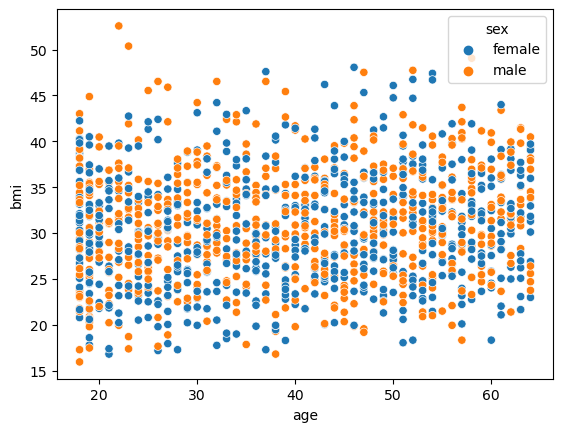

In [7]:
sns.scatterplot(df['age'],df['bmi'],hue=df['sex'])
plt.show()

***barplt b/w smoker and age on the basis of children***

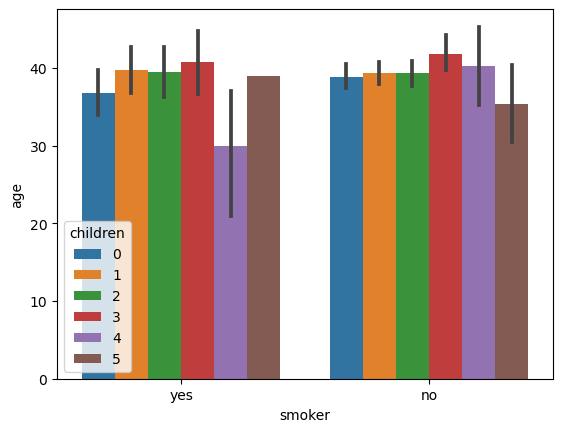

In [8]:
sns.barplot(df['smoker'],df['age'],hue=df['children'])
plt.show()

***barplt b/w children and age on the basis of smoker***

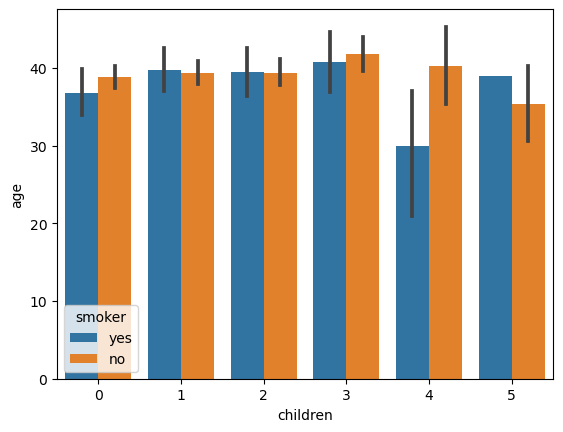

In [9]:
sns.barplot(df['children'],df['age'],hue=df['smoker'])
plt.show()

***barplt b/w children and bmi on the basis of smoker***

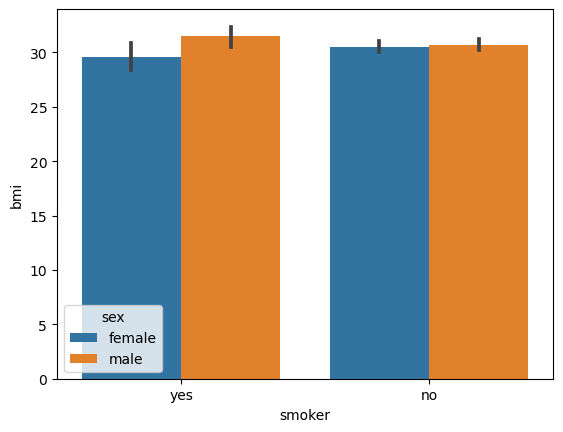

In [10]:
sns.barplot(df['smoker'],df['bmi'],hue=df['sex'])
plt.show()

### Check correlation

In [11]:
corr = df.corr()

In [12]:
corr

,age,bmi,children,charges
age,1.000000,0.114112,0.041491,0.298245
bmi,0.114112,1.000000,0.015346,0.202203
children,0.041491,0.015346,1.000000,0.067365
charges,0.298245,0.202203,0.067365,1.000000


#### Visculize corr

In [13]:
def corr_visculize(corr,figsize):
    plt.subplots(figsize=figsize)
    sns.heatmap(corr,annot=True,cbar=False)
    plt.title("Correlation b/w Columns")
    plt.show()

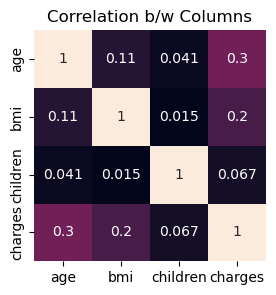

In [14]:
corr_visculize(corr,(3,3))

****
**Convert**
* Sex
* Children
* Smoker
* Region

**Into category**
****

In [15]:
objects = ['sex','children','smoker','region']
for i in objects:
    df[i] = df[i].astype('category')

***display type***

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   category
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.3 KB


### As our Machine Learning model only take integers, so let's convert categories into math

In [17]:
dummies = pd.get_dummies(df[objects])

In [18]:
dummies.head(2)

,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,0,1,0


***Add converted values into dataset***

In [19]:
df = pd.concat((df,dummies),axis=1)

In [20]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,children_0,...,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.90,0,yes,southwest,16884.9240,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1,18,male,33.77,1,no,southeast,1725.5523,0,1,0,...,0,0,0,0,1,0,0,0,1,0


## Remove unnecessary columns from our dataset

In [21]:
df.drop(objects,inplace=True,axis=1)

In [22]:
df.head(1)

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,16884.924,1,0,1,0,0,0,0,0,0,1,0,0,0,1


### Check corr again

In [23]:
corr = df.corr()

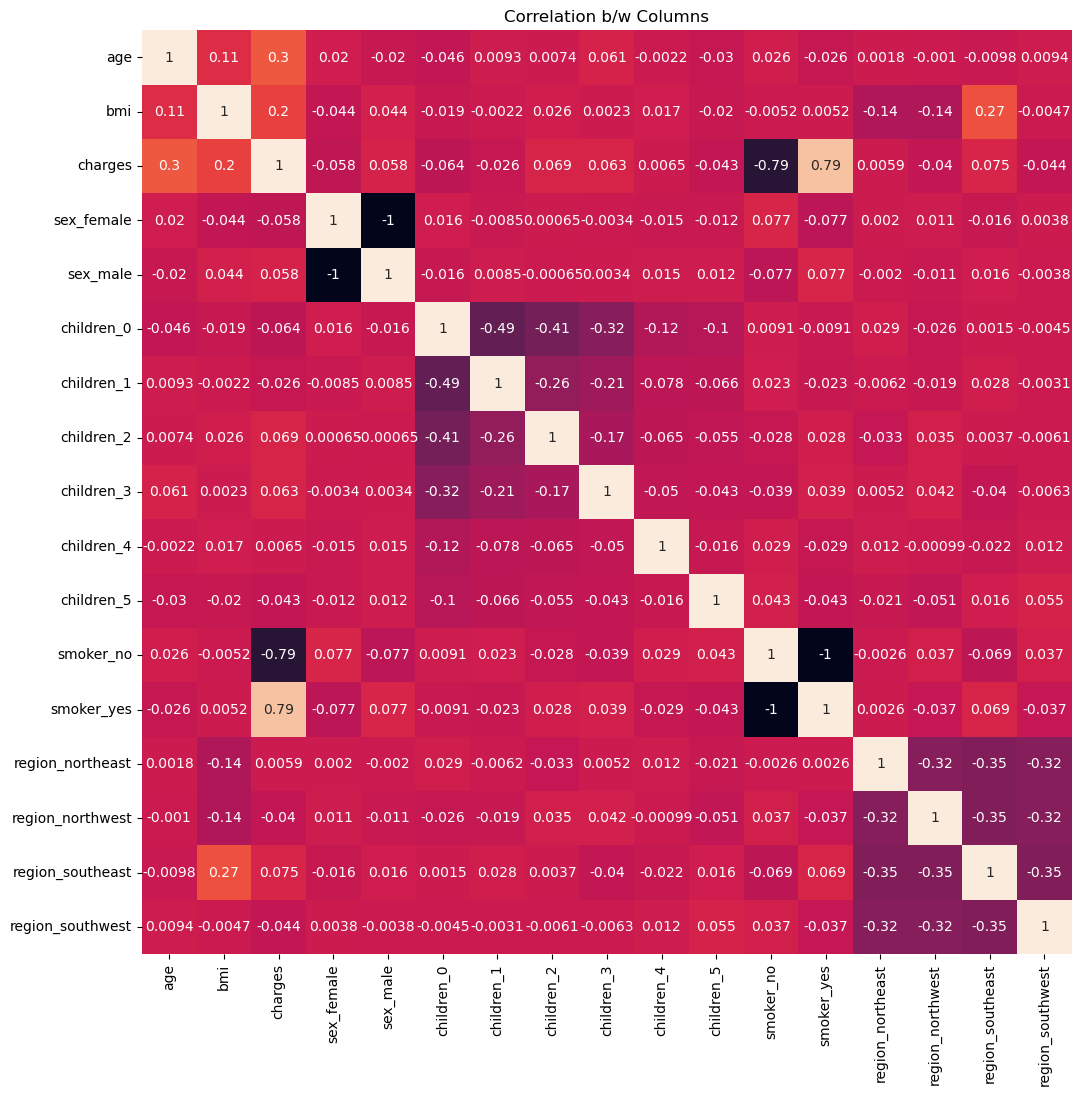

In [24]:
corr_visculize(corr,(12,12))

***Display first 4 rows***

In [25]:
df.head(4)

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,1,0,0


### Split data into x and y for training

In [26]:
df = df.sample(frac=1)
X = df.drop('charges',axis=1)
y = df['charges']

In [27]:
X.head(1)

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
875,23,28.12,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [28]:
y.head(1)

875    2690.1138
Name: charges, dtype: float64

# Split data into training and testing and validating

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# train_split = round(0.7 * len(df))  #Get 70% of data for training
# validate_split = round(train_split + 0.15*len(df)) #Get 15% of data for validaing

# x_train,y_train = X[:train_split],y[:train_split]
# x_validate, y_validate = X[train_split:validate_split], y[train_split:validate_split]
# x_test, y_test = X[validate_split:], y[validate_split:] #Get 15% of data for testing

In [30]:
x_train.shape, x_test.shape

((1069, 16), (268, 16))

### As now we have data ready for training, lets train our model
*** *** ***
**We need to predict number,charges.... so we get these things***
* Our problem is regression 
* LinnerRegression

**** ***
- Fit Our Model
*** ***

***
# `Linear Regression`

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

### Let's score our model

In [33]:
model.score(x_test,y_test)

0.7226281223715227

***Predict on x_test***

In [34]:
y_pred = model.predict(x_test)

In [35]:
y_pred[:10]

array([35472.11200976, 32548.3983027 , 33547.79688325, 10905.5626397 ,
       13675.31005593, 39922.0617477 ,  4148.83719305, 11364.53488279,
       16219.43176118, 11356.91367974])

### Line Graph

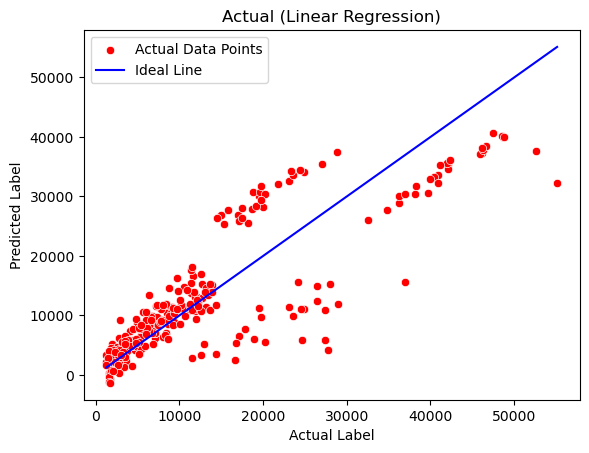

In [36]:
sns.scatterplot(x=y_test,y=y_pred,color='red',label='Actual Data Points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='blue',label='Ideal Line')
plt.legend()
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Actual (Linear Regression)")
plt.show()

## Residal Analysis

In [37]:
residual = y_test-y_pred

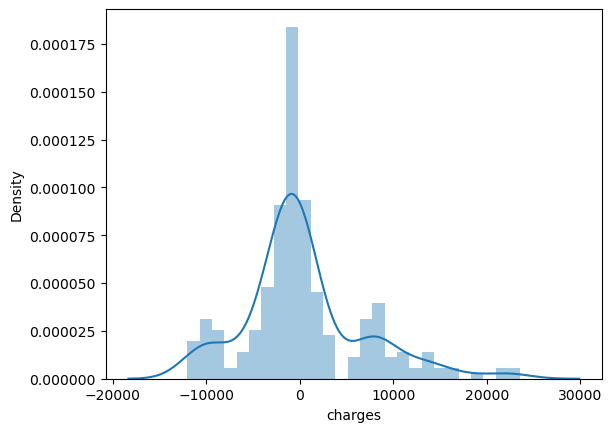

In [38]:
sns.distplot(residual,kde=True)
plt.show()

## Model evaluation

In [39]:
def evaluate_model(y_true, y_pred):
    '''
    Perform evaluation comparision on y_true and y_pred
    '''
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    metric_dict = {
        "accuracy": round(accuracy,2),
        "precision": round(precision,2),
        "recall": round(recall,2),
        "f1": round(f1,2),
    }
    
    print('**'*20)
    print(f'Accuracy : {accuracy*100:.2f}%')
    print(f'precision : {precision*100:.2f}%')
    print(f'recall : {recall*100:.2f}%')
    print(f'f1 : {f1*100:.2f}%')
    
    return metric_dict

In [40]:
def evaluate_regressor_model(y_true, y_pred):
    '''
    Perform evaluation comparision on y_true and y_pred
    '''
    mean_square = mean_squared_error(y_true, y_pred)
    mean_absolute = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true,y_pred)
    
    metric_dict = {
        "mean_square": round(mean_square,2),
        "mean_absolute": round(mean_absolute,2),
        "r2_score": round(r2,2)
    }
    
    print('**'*20)
    print(f'mean_square : {mean_square:.2f}')
    print(f'mean_absolute : {mean_absolute:.2f}')
    print(f'r2_score : {r2:.2f}')
    
    return metric_dict

In [41]:
# evaluate_model(y_validate,y_pred)

In [42]:
linear_matrix = evaluate_regressor_model(y_test,y_pred)

****************************************
mean_square : 41443414.81
mean_absolute : 4436.13
r2_score : 0.72


***
# `Try Random Forest`

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = RandomForestRegressor()

In [45]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
y_pred = model.predict(x_test)

In [47]:
model.score(x_test,y_test)

0.8015968666776419

### Evaluate model

In [48]:
random_matrix = evaluate_regressor_model(y_test,y_pred)

****************************************
mean_square : 29644329.57
mean_absolute : 3008.74
r2_score : 0.80


### Line Graph

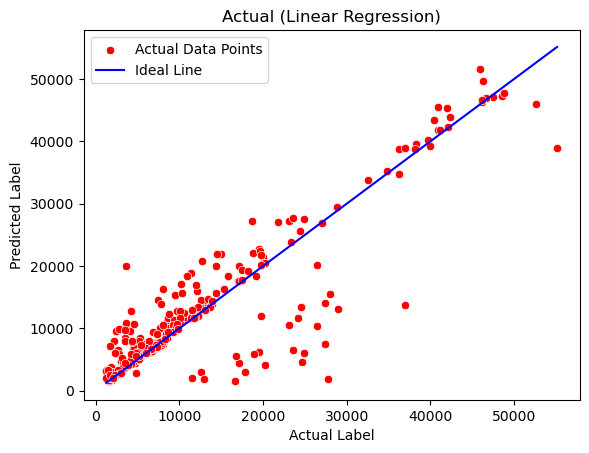

In [49]:
sns.scatterplot(x=y_test,y=y_pred,color='red',label='Actual Data Points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='blue',label='Ideal Line')
plt.legend()
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Actual (Linear Regression)")
plt.show()

*** ***
# `Try GradientBoostingRegressor`

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8318579496821207

In [51]:
y_pred = model.predict(x_test)

### Line Graph

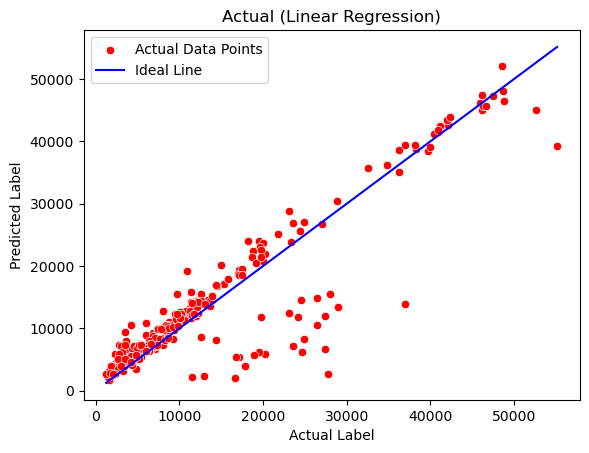

In [52]:
sns.scatterplot(x=y_test,y=y_pred,color='red',label='Actual Data Points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='blue',label='Ideal Line')
plt.legend()
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Actual (Linear Regression)")
plt.show()

### Evaluation

In [53]:
gradient_matrix = evaluate_regressor_model(y_test,y_pred)

****************************************
mean_square : 25122881.23
mean_absolute : 2845.89
r2_score : 0.83


***
# `Compare Different Model Matrix`
***

In [54]:
compare_matrix = pd.DataFrame(data={
    'Linear Regression':linear_matrix,
    'Random Forest':random_matrix,
    'Gradient Booster':gradient_matrix
})

In [55]:
compare_matrix

,Linear Regression,Random Forest,Gradient Booster
mean_square,41443414.81,29644329.57,25122881.23
mean_absolute,4436.13,3008.74,2845.89
r2_score,0.72,0.80,0.83


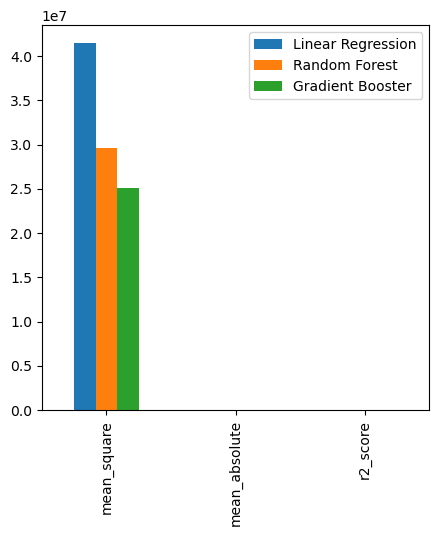

In [56]:
compare_matrix.plot.bar(figsize=(5,5))
plt.show()

In [64]:
import pickle

In [65]:
pickle.dump(model,open('gradien_boost.pkl','wb'))

In [57]:
gbc_df = pd.DataFrame(data={
    'Actual value':y_test,
    'Predicted Value':y_pred
})

In [58]:
gbc_df.tail()

,Actual value,Predicted Value
763,3070.8087,3897.420569
604,17468.9839,18597.892841
578,9724.5300,12353.988576
504,5974.3847,6438.656032
720,9875.6804,10453.040903


In [59]:
charg = np.array(df['charges'])

In [60]:
charg.max()

63770.42801

In [61]:
np.array(df['bmi']).max()

52.58

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_val_score(model,X,y)

array([0.86189674, 0.86323559, 0.82437836, 0.85182746, 0.86576624])

In [67]:
x_test.head(1)

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
852,46,35.53,1,0,1,0,0,0,0,0,0,1,1,0,0,0
